In [1]:
#Importing necessary library
import re
import numpy as np
import pandas as pd
import scipy.sparse as sp
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import seaborn as sns
from seaborn import countplot

In [2]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
from nltk.corpus import stopwords
from nltk.tokenize.treebank import TreebankWordDetokenizer
from collections import Counter

In [4]:
#loading dataset
bbc_data = pd.read_csv("bbc-text.csv")
#printing the first 10 entries
bbc_data.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [5]:
#retriving basic information of the data
bbc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  2225 non-null   object
 1   text      2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


In [6]:
#checking for null entries
bbc_data.isnull().sum()

category    0
text        0
dtype: int64

In [7]:
#brief description of the dataset
bbc_data.describe()

,category,text
count,2225,2225
unique,5,2126
top,sport,kennedy questions trust of blair lib dem leade...
freq,511,2


In [8]:
#checking the unmbers of unique characters
bbc_data.nunique()

category       5
text        2126
dtype: int64

In [9]:
#display the categories
bbc_data.category.unique()

array(['tech', 'business', 'sport', 'entertainment', 'politics'],
      dtype=object)

Text(0.5, 1.0, 'category count')

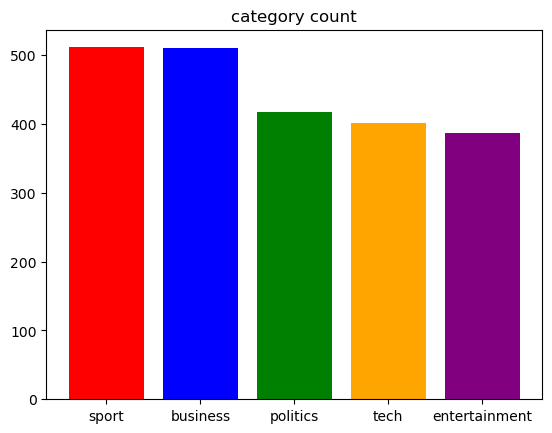

In [10]:
#plotting the category
category_counts = bbc_data['category'].value_counts()
colors = ['red', 'blue', 'green', 'orange', 'purple']
plt.bar(category_counts.index, category_counts.values, color = colors)
plt.title("category count")

In [11]:
#A view of the text
bbc_data["text"][0]

'tv future in the hands of viewers with home theatre systems  plasma high-definition tvs  and digital video recorders moving into the living room  the way people watch tv will be radically different in five years  time.  that is according to an expert panel which gathered at the annual consumer electronics show in las vegas to discuss how these new technologies will impact one of our favourite pastimes. with the us leading the trend  programmes and other content will be delivered to viewers via home networks  through cable  satellite  telecoms companies  and broadband service providers to front rooms and portable devices.  one of the most talked-about technologies of ces has been digital and personal video recorders (dvr and pvr). these set-top boxes  like the us s tivo and the uk s sky+ system  allow people to record  store  play  pause and forward wind tv programmes when they want.  essentially  the technology allows for much more personalised tv. they are also being built-in to high

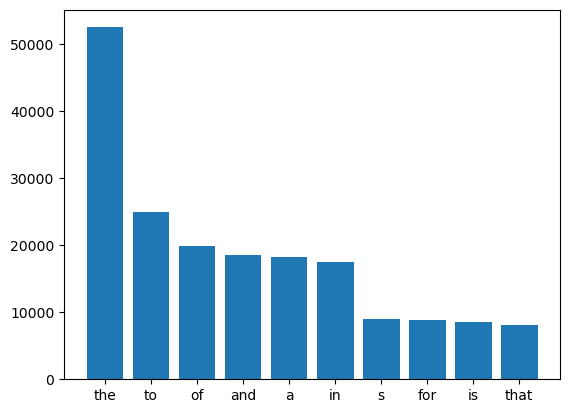

In [12]:
#checking the frequency used words

def plot_stopwords(data):
    stop=set(stopwords.words('english'))
    data_split= data.str. split ()
    data_list=data_split.values.tolist()
    corpus=[word for i in data_list for word in i]
    from collections import defaultdict
    dictionary_stopwords=defaultdict(int)
    for word in corpus:
        if word in stop:
            dictionary_stopwords[word]+=1
            
    top=sorted (dictionary_stopwords.items (), key=lambda x:x[1],reverse=True)[:10]
    x,y=zip(*top)
    plt.bar (x,y)
    
plot_stopwords(bbc_data["text"])

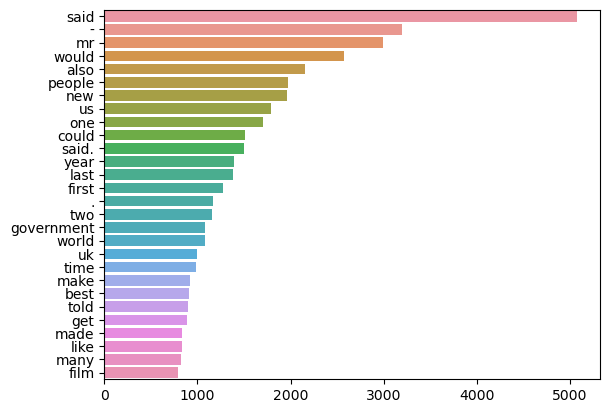

In [13]:
def frequent_words(data):
    stop=set (stopwords. words ('english'))
    data_split= data.str. split ()
    data_list=data_split.values.tolist()
    corpus=[word for i in data_list for word in i]
    counter=Counter(corpus)
    mostCommon=counter.most_common()
    x, y=[], []
    for word, count in mostCommon[:100]:
        if (word not in stop):
            x.append (word )
            y.append (count)
    sns.barplot(x=y,y=x)
frequent_words(bbc_data['text'])

In [14]:
import re
import nltk
from nltk.corpus import stopwords

def tokenize(text):
    return nltk.word_tokenize(text)

def remove_stop_words(tokens):
    stop_words = set(stopwords.words('english'))
    return [token for token in tokens if token not in stop_words]

def remove_numbers_and_special_characters(tokens):
    regex = "[a-z]+"
    return [char for char in tokens if re.match(regex, char)]

def cleaning(bbc_data):
    if len(bbc_data) == 0:
        print("The dataset is empty.")
        return

    print("Tokenizing the text...")
    bbc_data["text_clean"] = bbc_data["text"].apply(tokenize)

    print("Removing stop words...")
    bbc_data["text_clean"] = bbc_data["text_clean"].apply(remove_stop_words)

    print("Removing numbers and special characters...")
    bbc_data["text_clean"] = bbc_data["text_clean"].apply(remove_numbers_and_special_characters)

    print("The cleaned dataset:")
    print(bbc_data.head())

if __name__ == "__main__":
    bbc_data = pd.read_csv("bbc-text.csv")
    cleaning(bbc_data)

Tokenizing the text...
Removing stop words...
Removing numbers and special characters...
The cleaned dataset:
        category                                               text  \
0           tech  tv future in the hands of viewers with home th...   
1       business  worldcom boss  left books alone  former worldc...   
2          sport  tigers wary of farrell  gamble  leicester say ...   
3          sport  yeading face newcastle in fa cup premiership s...   
4  entertainment  ocean s twelve raids box office ocean s twelve...   

                                          text_clean  
0  [tv, future, hands, viewers, home, theatre, sy...  
1  [worldcom, boss, left, books, alone, former, w...  
2  [tigers, wary, farrell, gamble, leicester, say...  
3  [yeading, face, newcastle, fa, cup, premiershi...  
4  [ocean, twelve, raids, box, office, ocean, twe...  


In [15]:
#since we tokenized we have to undo that process
#detokenizing the data
def detoken(data):
    for i in range(len(data)):
        text_clean = TreebankWordDetokenizer().detokenize(data["text_clean"][i])
        data["text_clean"][i] = text_clean
print(len(bbc_data))
detoken(bbc_data)

2225


In [16]:
#assigning numerical values to the unique values
bbc_data.category = bbc_data.category.map({"tech": 0, "business": 1, "sport": 2, "entertainment": 3, "politics": 4})


In [17]:
#A View of the clean text
bbc_data["text_clean"][0]

'tv future hands viewers home theatre systems plasma high-definition tvs digital video recorders moving living room way people watch tv radically different five years time according expert panel gathered annual consumer electronics show las vegas discuss new technologies impact one favourite pastimes us leading trend programmes content delivered viewers via home networks cable satellite telecoms companies broadband service providers front rooms portable devices one talked-about technologies ces digital personal video recorders dvr pvr set-top boxes like us tivo uk sky+ system allow people record store play pause forward wind tv programmes want essentially technology allows much personalised tv also built-in high-definition tv sets big business japan us slower take europe lack high-definition programming people forward wind adverts also forget abiding network channel schedules putting together a-la-carte entertainment us networks cable satellite companies worried means terms advertising

In [18]:
#Assigning X and Y parameters
X = bbc_data["text_clean"]
y = bbc_data.category

In [19]:
#spliting data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, random_state = 8)

In [20]:
#bag of words
vect = CountVectorizer(stop_words = "english", lowercase = False)
vect.fit(X_train)
vect.vocabulary_

X_train_trans = vect.transform(X_train)
X_test_trans = vect.transform(X_test)
#X_train_trans.toarray()

## Building the Model

In [21]:
#logistic_reg = LogisticRegression()
#from sklearn.model_selection import cross_val_score
#from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_trans, y_train)

LogisticRegression()

In [22]:
#after transforming the data
y_predict = model.predict(X_test_trans)
accuracy = accuracy_score(y_test, y_predict)
accuracy*100

97.66606822262118

In [23]:
confusion_mat = confusion_matrix(y_test, y_predict)
print(confusion_mat)
TrueNeg = confusion_mat[0, 0]
TruePos=confusion_mat[1, 1]
FalseNeg= confusion_mat[1, 0]
FalsePos = confusion_mat[0, 1]
sensitivity = TruePos / float(FalseNeg + TruePos)
print ("sensitivity" , sensitivity)

specificity = TrueNeg / float (TrueNeg + FalsePos)
print ("specificity", specificity)

[[ 98   2   0   0   0]
 [  1 120   2   0   3]
 [  0   1 129   0   0]
 [  1   0   0 104   1]
 [  1   1   0   0  93]]
sensitivity 0.9917355371900827
specificity 0.98
